### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

### Some Key definition
#### Item Visibility -- The % of total display area of all products in a store allocated to the particular product
#### Outlet size -- The size of the store in terms of ground area covered
#### Outlet type -- Whether the outlet is just a grocery store or some sort of supermarket
#### Item Outlet Sales --  Sales of the product in the particular store. This is the outcome variable to be predicted.
#### Outlet location type -- 	The type of city in which the store is located

### Read Dataframe

In [5]:
df  =pd.read_csv("../input/datasetbig-market/train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Check nan values

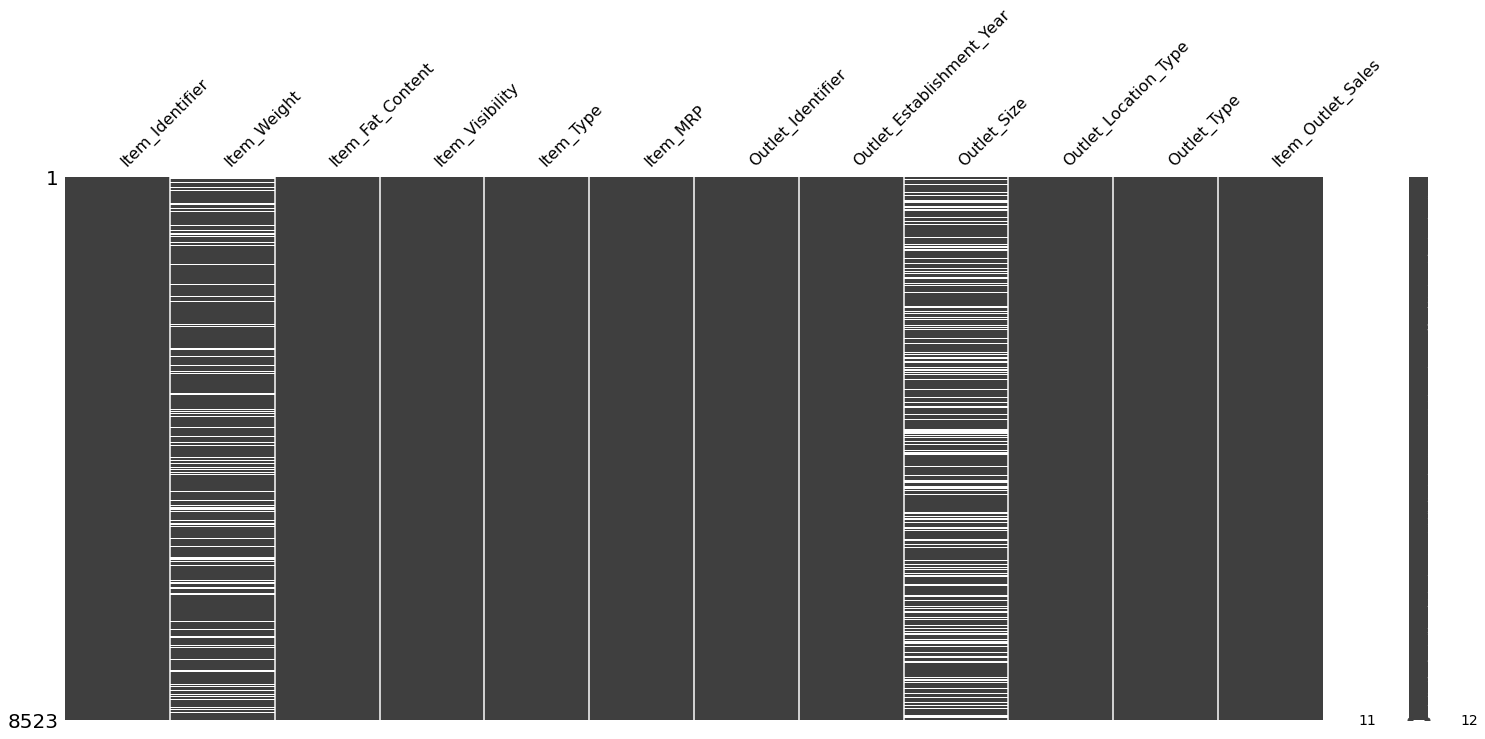

In [6]:
import missingno as msno
msno.matrix(df)

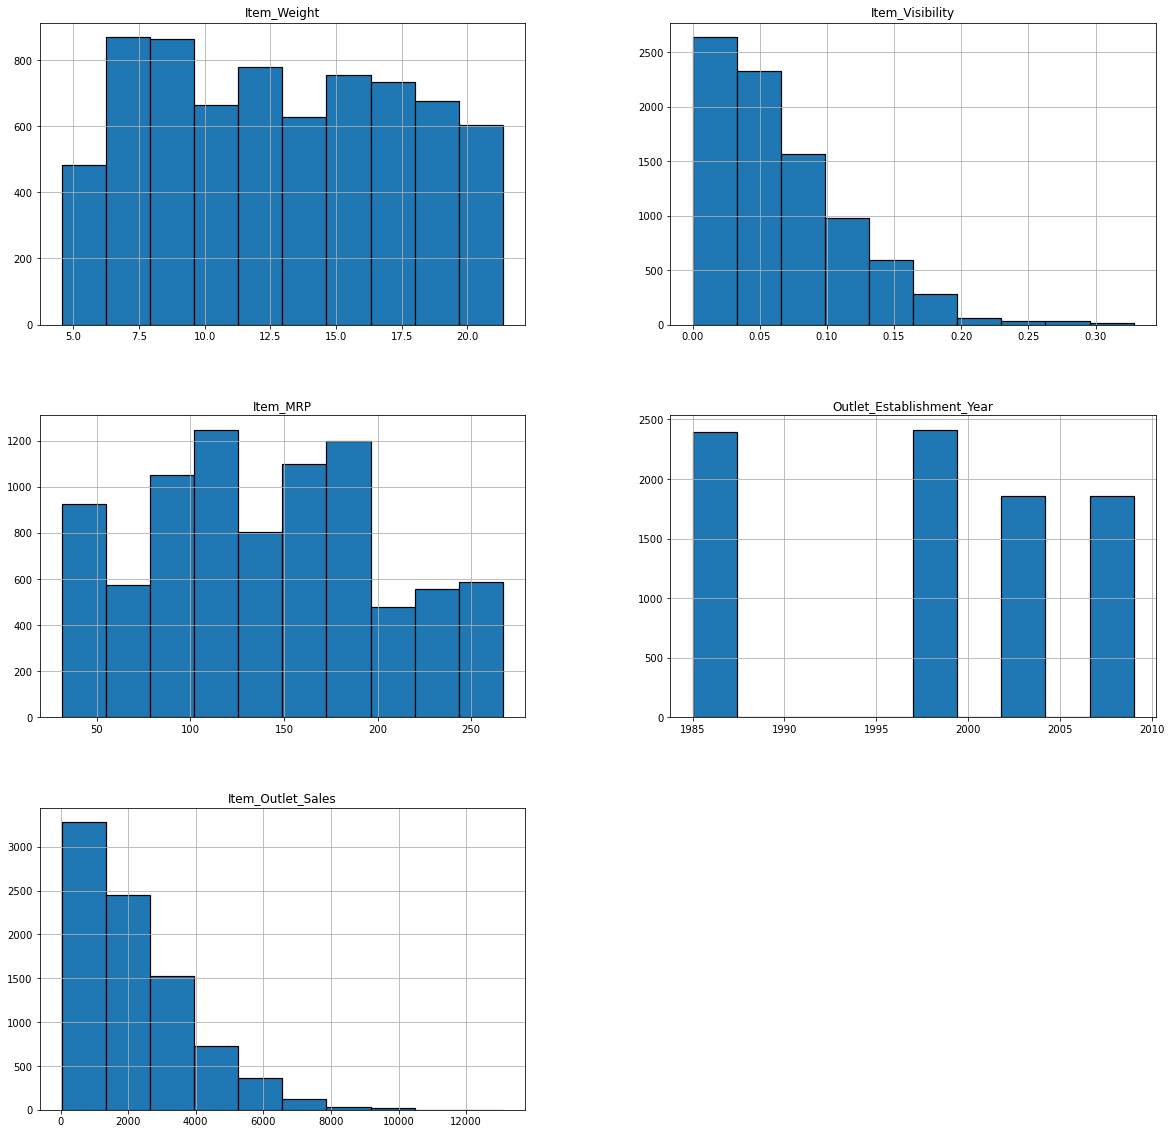

In [7]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))
plt.show()

### We can see that ,Item Visibilty decreases with positive relation with Item Outlet Sales
### hence ,we can conclude that "As the product display area increases , we get more sales"

### Check the 1st column(Item_Identifier)

In [8]:
df["Item_Identifier"]

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

### As we can see , there are many first 2 letters same , I tried to split them and make a new column (Item_Code)

In [9]:
#make a new column for item code

for i in range(len(df)):
    df.loc[i , "Item_Code"] = df.loc[i,"Item_Identifier"][:2]

In [10]:
df["Item_Code"]

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Code, Length: 8523, dtype: object

### Check info of dataframe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Code                  8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

### drop item_identifier column as we have already extracted the code info

In [12]:
# drop Item_Identifier
df  =df.drop(["Item_Identifier"] , axis =1)

In [13]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Code
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FD
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,FD
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NC
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FD


### Count the unique item code and plot them !

In [14]:
## count the item_code and find unique values
df["Item_Code"].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Code, dtype: int64

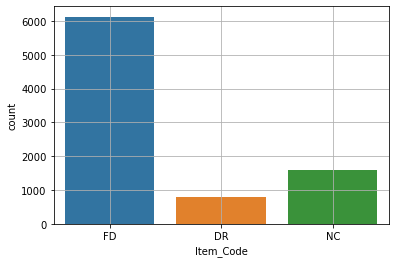

FD    6125
NC    1599
DR     799
Name: Item_Code, dtype: int64


In [15]:
sb.countplot(df["Item_Code"])
plt.grid()
plt.show()
print(df["Item_Code"].value_counts())

### We can see , we have FD , as the majority Item code ! , Is there any relation between this code and Item_Outlet_sales ? ,We will find it out later 

### Lets plot and check our item weight !

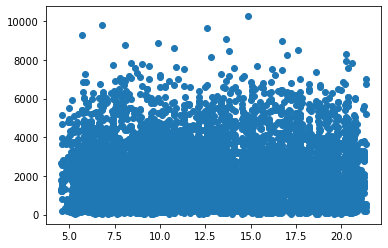

In [16]:
plt.scatter(df["Item_Weight"], df["Item_Outlet_Sales"])

### Check any outlier 

12.6


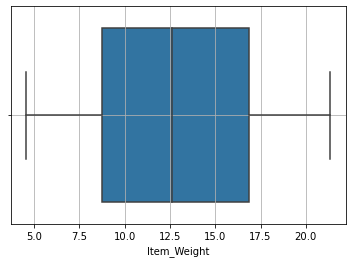

In [17]:
sb.boxplot(df["Item_Weight"])
plt.grid()
print(df["Item_Weight"].median())

### No outliers in Item Weight !

-1.2277664144376634
0.0824262091221237


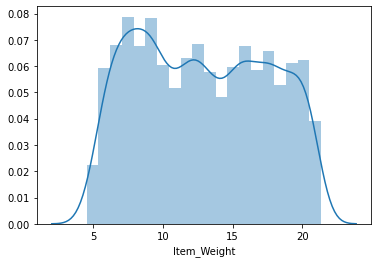

In [18]:
sb.distplot(df["Item_Weight"].dropna())
print(df["Item_Weight"].kurt())
print(df["Item_Weight"].skew())


### Since , there is no skewness and kurt looks good ! , We shall fill the NaN values with  mean !

In [19]:
print(df["Item_Weight"].isna().sum())


df["Item_Weight"].fillna(df["Item_Weight"].mean() ,  inplace = True)

print(df["Item_Weight"].isna().sum())


1463
0


### lets again check the distribution!

-0.8602944788067419
0.09056145191764828


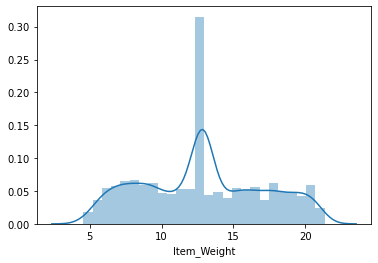

In [20]:
sb.distplot(df["Item_Weight"].dropna())
print(df["Item_Weight"].kurt())
print(df["Item_Weight"].skew())


### Lets hop on to Item Fat Content

In [21]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

### Lets check some relation

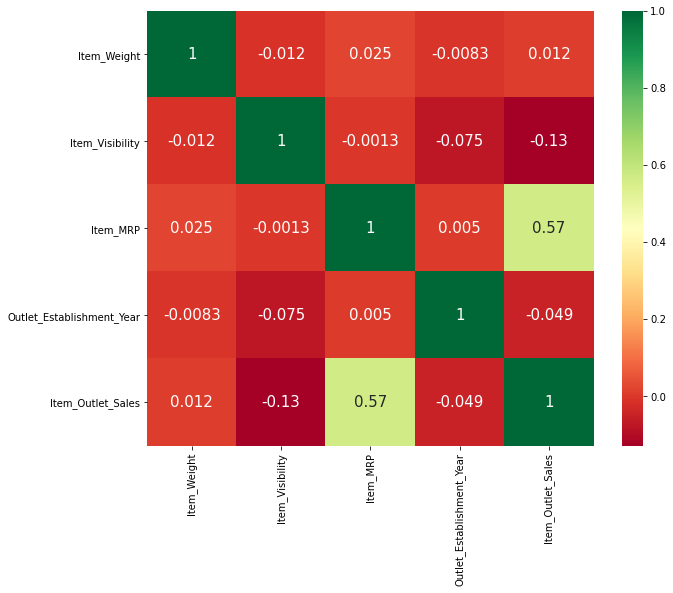

In [22]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

#### We can see clearly , The Item MRP accounts for more than 50 % of Item Outlet Sales , and Item Visibilty with 12 % 

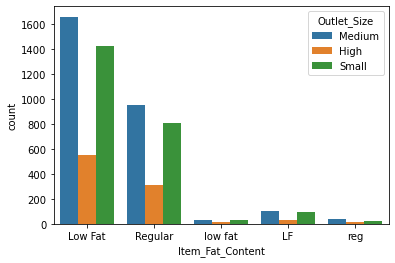

In [23]:
sb.countplot(df["Item_Fat_Content"] , hue = df["Outlet_Size"])

#### Since , there are more than one category of same type in fat type , I renamed them to the original type

In [24]:
## mapping
fat = {
    "Low Fat":"Low Fat","Regular":"Regular","low fat":"Low Fat","LF":"Low Fat","reg":"Regular"
}

df.loc[: , "Item_Fat_Content"] = df.loc[: , "Item_Fat_Content"].map(fat)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


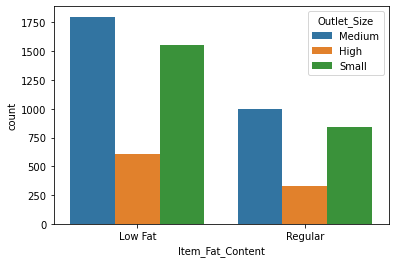

In [25]:
sb.countplot(df["Item_Fat_Content"] , hue = df["Outlet_Size"])
print(df["Item_Fat_Content"].value_counts())

####  We can see there are more low fat product than regular , and hence it is related with outlet size 

In [26]:
#### converting this category into numerical!
## mapping
cat = {
    "Low Fat": 1,"Regular":0
}

df.loc[: , "Item_Fat_Content"] = df.loc[: , "Item_Fat_Content"].map(cat)

In [27]:
### lets check the co-relation again
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,0.021157,-0.012049,0.024756,-0.008301,0.011550
Item_Fat_Content,0.021157,1.000000,-0.047314,-0.006063,-0.003151,-0.018719
Item_Visibility,-0.012049,-0.047314,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.006063,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.003151,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.018719,-0.128625,0.567574,-0.049135,1.000000


#### Not much co-relation

### Now , lets go for Item Visibility 

In [28]:
df["Item_Visibility"]

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

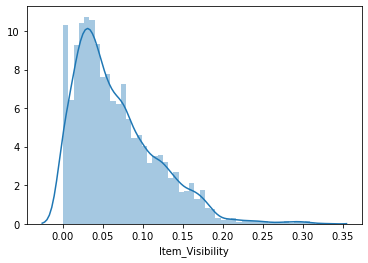

1.1670905496918407


In [29]:
sb.distplot(df["Item_Visibility"])
plt.show()
print(df["Item_Visibility"].skew())

#### I can see some outliers , lets find out

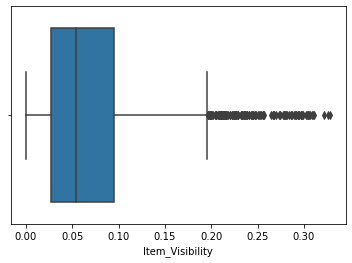

In [30]:
sb.boxplot(df["Item_Visibility"])

In [31]:
#### Lets remove the outliers
cols = "Item_Visibility"
high = 0.18
low = 0.0
df = df[(df[cols] > low) & (df[cols] < high)]

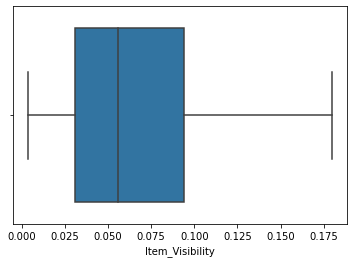

In [32]:
#### Lets check again

sb.boxplot(df["Item_Visibility"])

#### though the outliers is removed , we can see that it is left skewed !

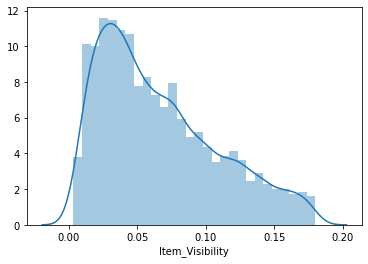

0.7331544572443054


In [33]:
sb.distplot(df["Item_Visibility"])
plt.show()
print(df["Item_Visibility"].skew())

#### We can apply, log transformation and check the skewness again!

In [34]:
df["Item_Visibility"] = np.log10(df["Item_Visibility"])
df["Item_Visibility"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      -1.794598
1      -1.714933
2      -1.775724
6      -1.894793
7      -0.894593
          ...   
8518   -1.245779
8519   -1.328065
8520   -1.453627
8521   -0.837972
8522   -1.347964
Name: Item_Visibility, Length: 7769, dtype: float64

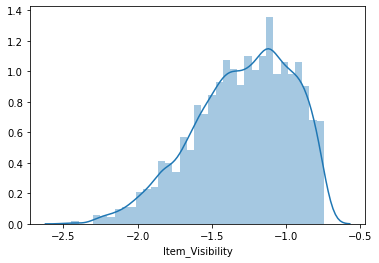

-0.5193282394757215


In [35]:
sb.distplot(df["Item_Visibility"])
plt.show()
print(df["Item_Visibility"].skew())

#### looks a little better

In [36]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,0.025202,-0.011904,0.027181,-0.008069,0.008839
Item_Fat_Content,0.025202,1.000000,-0.057360,-0.012756,-0.006849,-0.021578
Item_Visibility,-0.011904,-0.057360,1.000000,0.002599,-0.022496,-0.059361
Item_MRP,0.027181,-0.012756,0.002599,1.000000,0.004344,0.577356
Outlet_Establishment_Year,-0.008069,-0.006849,-0.022496,0.004344,1.000000,-0.069994
Item_Outlet_Sales,0.008839,-0.021578,-0.059361,0.577356,-0.069994,1.000000


### lest go for Item Type

In [37]:
df["Item_Type"]

0                    Dairy
1              Soft Drinks
2                     Meat
6              Snack Foods
7              Snack Foods
               ...        
8518           Snack Foods
8519          Baking Goods
8520    Health and Hygiene
8521           Snack Foods
8522           Soft Drinks
Name: Item_Type, Length: 7769, dtype: object

#### Check unique counts and plot

Fruits and Vegetables    1113
Snack Foods              1104
Household                 833
Frozen Foods              792
Dairy                     622
Canned                    593
Baking Goods              577
Health and Hygiene        479
Meat                      398
Soft Drinks               397
Breads                    229
Hard Drinks               193
Others                    151
Starchy Foods             128
Breakfast                 103
Seafood                    57
Name: Item_Type, dtype: int64


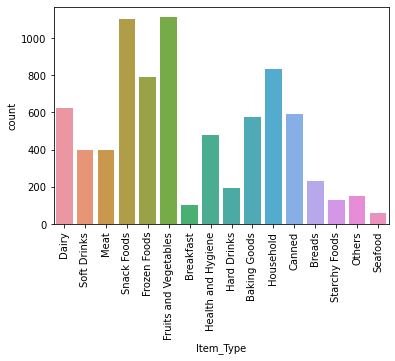

In [38]:
print(df["Item_Type"].value_counts())
sb.countplot(df["Item_Type"])
plt.xticks(rotation = 90)
plt.show()

#### lets combine many different food type into 'Fruits and Vegetables' , 'Sancks','Health and Hygiene','Drinks' etc

In [39]:
food = {
    "Household": "Others","Frozen Foods":"Snack Foods" ,"Dairy":"Snack Foods", "Canned" : "Snack Foods", "Soft Drinks":"Drinks",
  "Hard Drinks":"Drinks"  ,"Starchy Foods":"Baking Goods","Breads":"Baking Goods","Meat":"Seafood","Breakfast":"Fruits and Vegetables",
    "Starchy Foods":"Baking Goods","Fruits and Vegetables":"Fruits and Vegetables","Snack Foods":"Snack Foods","Baking Goods":"Baking Goods",
    "Health and Hygiene":"Health and Hygiene","Seafood":"Seafood","Others":"Others",
}

df.loc[: , "Item_Type"] = df.loc[: , "Item_Type"].map(food)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Snack Foods              3111
Fruits and Vegetables    1216
Others                    984
Baking Goods              934
Drinks                    590
Health and Hygiene        479
Seafood                   455
Name: Item_Type, dtype: int64


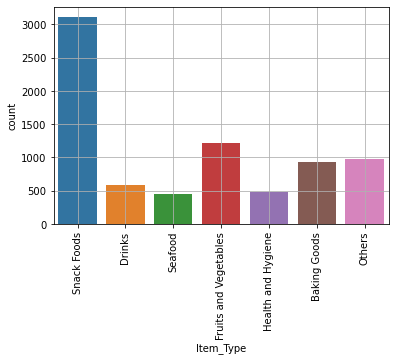

In [40]:
print(df["Item_Type"].value_counts())
sb.countplot(df["Item_Type"])
plt.xticks(rotation = 90)
plt.grid()
plt.show()

#### Encode this item_type into numerical , and giving more value to high quantity item

In [41]:
encode = {
    "Snack Foods":7 ,"Fruits and Vegetables":6,"Others":5,"Baking Goods":4,"Drinks":3,"Health and Hygiene":2,"Seafood":1
}

df.loc[: , "Item_Type"] = df.loc[: , "Item_Type"].map(encode)

7    3111
6    1216
5     984
4     934
3     590
2     479
1     455
Name: Item_Type, dtype: int64


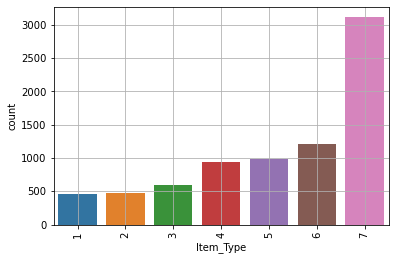

In [42]:
print(df["Item_Type"].value_counts())
sb.countplot(df["Item_Type"])
plt.xticks(rotation = 90)
plt.grid()
plt.show()

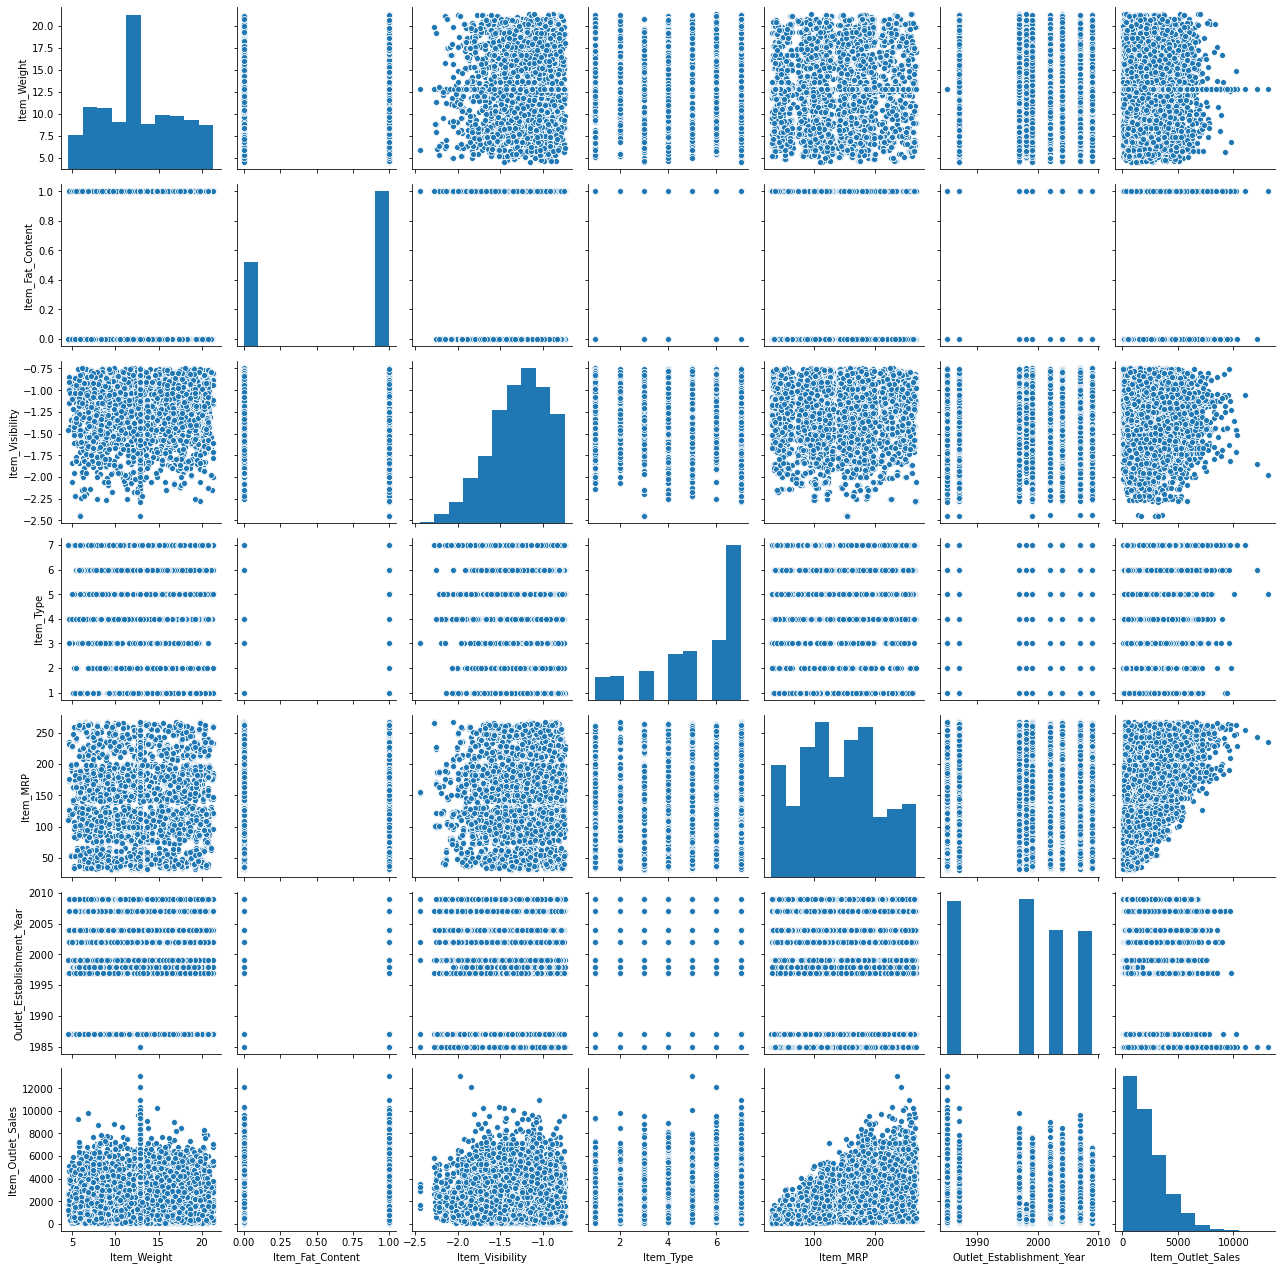

In [43]:
sb.pairplot(df )

### We can see , as item mrp increases , outlet sales increases 

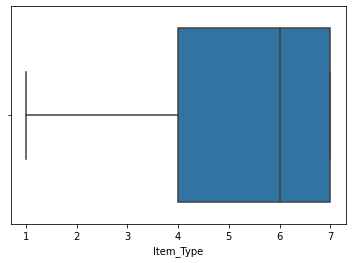

In [44]:
sb.boxplot(df["Item_Type"])

#### We can see , much item type are concentrated to the right of median (6)

In [45]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Code
0,9.300000,1,-1.794598,7,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,5.920000,0,-1.714933,3,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,17.500000,1,-1.775724,1,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
6,13.650000,0,-1.894793,7,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,FD
7,12.857645,1,-0.894593,7,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,FD
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,1,-1.245779,7,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FD
8519,8.380000,0,-1.328065,4,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,FD
8520,10.600000,1,-1.453627,2,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NC
8521,7.210000,0,-0.837972,7,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FD


#### Lets go for Item MRP

In [46]:
df["Item_MRP"].describe()

count    7769.000000
mean      141.284440
std        62.122423
min        31.290000
25%        94.175200
50%       143.215400
75%       185.826600
max       266.888400
Name: Item_MRP, dtype: float64

Kurt -0.8856077097078825
Skew 0.12276214388421554


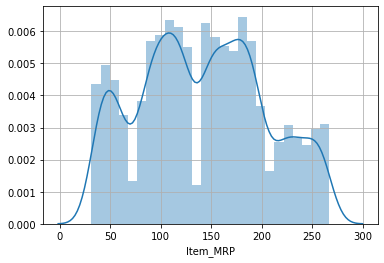

In [47]:
sb.distplot(df["Item_MRP"])
print("Kurt" , df["Item_MRP"].kurt())
print("Skew", df["Item_MRP"].skew())
plt.grid()
plt.show()


#### Any outliers

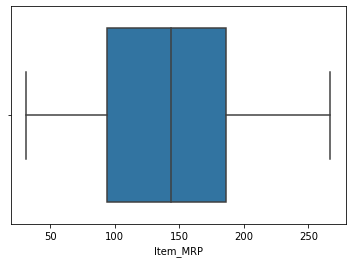

In [48]:
sb.boxplot(df["Item_MRP"])

#### No oulier  , very clean !

In [49]:
print("Co-relation of sales and mrp is :",stats.pearsonr(df["Item_Outlet_Sales"] , df["Item_MRP"])[0])

Co-relation of sales and mrp is : 0.5773559921342621


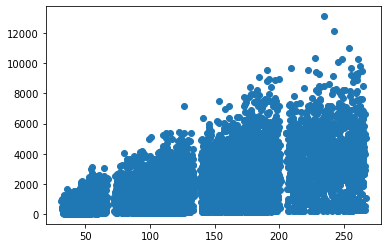

In [50]:
plt.scatter(df["Item_MRP"],df["Item_Outlet_Sales"])
plt.show()

#### Lets go for Outlet Identifier

In [51]:
df["Outlet_Identifier"]

0       OUT049
1       OUT018
2       OUT049
6       OUT013
7       OUT027
         ...  
8518    OUT013
8519    OUT045
8520    OUT035
8521    OUT018
8522    OUT046
Name: Outlet_Identifier, Length: 7769, dtype: object

In [52]:
### No meaning here , lets drop this column
df =df.drop(["Outlet_Identifier"] , axis =1)

#### Establishment year

In [53]:
df["Outlet_Establishment_Year"]

0       1999
1       2009
2       1999
6       1987
7       1985
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 7769, dtype: int64

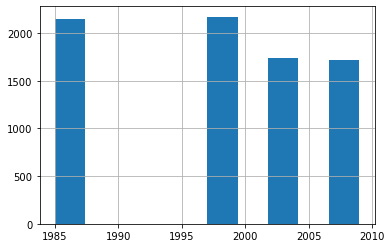

In [54]:
plt.hist(df["Outlet_Establishment_Year"])
plt.grid()
plt.show()

In [55]:
print("Co-relation of sales and mrp is :",stats.pearsonr(df["Item_Outlet_Sales"] , df["Outlet_Establishment_Year"])[0])

Co-relation of sales and mrp is : -0.06999353412667227


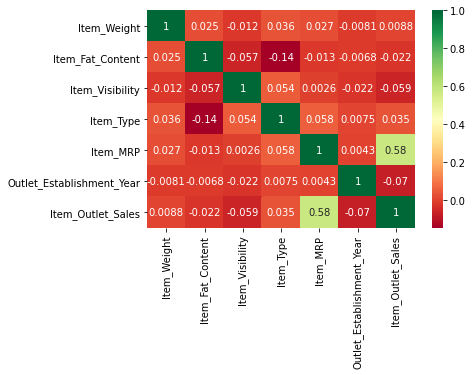

In [56]:
sb.heatmap(df.corr() , cmap="RdYlGn" , annot =True)

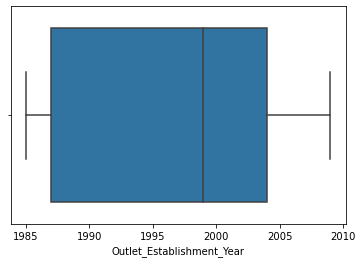

In [57]:
sb.boxplot(df["Outlet_Establishment_Year"])

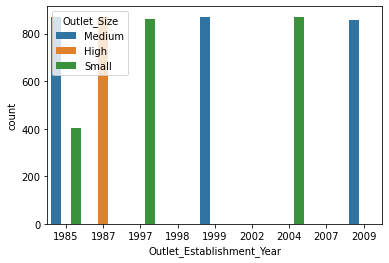

In [58]:
sb.countplot(df["Outlet_Establishment_Year"] , hue = df["Outlet_Size"])

#### As the year increased . the area of outlet increased and then became constant ( Medium)

In [59]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Code
0,9.300000,1,-1.794598,7,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,5.920000,0,-1.714933,3,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,17.500000,1,-1.775724,1,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
6,13.650000,0,-1.894793,7,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528,FD
7,12.857645,1,-0.894593,7,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636,FD
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,1,-1.245779,7,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834,FD
8519,8.380000,0,-1.328065,4,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850,FD
8520,10.600000,1,-1.453627,2,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136,NC
8521,7.210000,0,-0.837972,7,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FD


#### Look into Outlet Size

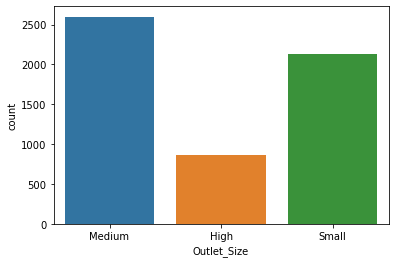

In [60]:
df["Outlet_Size"].value_counts()
sb.countplot(df["Outlet_Size"])

In [61]:
df["Outlet_Size"].isna().sum()

2168

### Since , the high outlet area is less  ,let us fill the nan with high

In [62]:
df["Outlet_Size"].fillna(value = "High" , inplace = True)

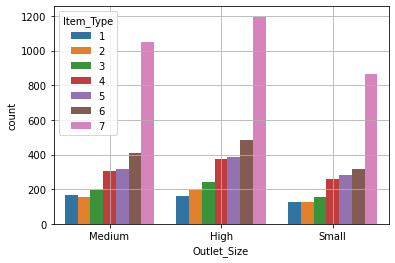

In [63]:
sb.countplot(df["Outlet_Size"] , hue = df["Item_Type"])
plt.grid()

### We can see , the high outlet area , has majority of the item !

In [64]:
## we will encode it 
out = {
    "Medium":2 , "Small":1,"High":3
}

df.loc[: , "Outlet_Size"] = df.loc[: , "Outlet_Size"].map(out) 

In [65]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
Item_Weight,1.000000,0.025202,-0.011904,0.036343,0.027181,-0.008069,0.001209,0.008839
Item_Fat_Content,0.025202,1.000000,-0.057360,-0.144768,-0.012756,-0.006849,-0.002195,-0.021578
Item_Visibility,-0.011904,-0.057360,1.000000,0.054497,0.002599,-0.022496,-0.007711,-0.059361
Item_Type,0.036343,-0.144768,0.054497,1.000000,0.057840,0.007480,-0.003525,0.034615
Item_MRP,0.027181,-0.012756,0.002599,0.057840,1.000000,0.004344,-0.005944,0.577356
Outlet_Establishment_Year,-0.008069,-0.006849,-0.022496,0.007480,0.004344,1.000000,0.048901,-0.069994
Outlet_Size,0.001209,-0.002195,-0.007711,-0.003525,-0.005944,0.048901,1.000000,-0.018297
Item_Outlet_Sales,0.008839,-0.021578,-0.059361,0.034615,0.577356,-0.069994,-0.018297,1.000000


#### We can see , that outlet size contributes to 2 % of item sales

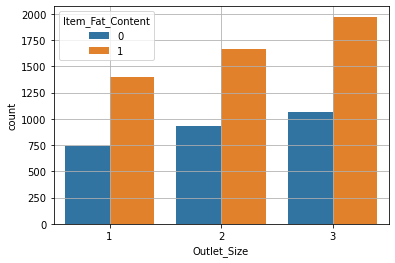

In [66]:
sb.countplot(df["Outlet_Size"] , hue = df["Item_Fat_Content"])
plt.grid()

#### It can be seen that , the outlet area holds equal proportion of fat(1) and regular item(0)

### Lets go for Location Type of Outlet

Tier 3    3037
Tier 2    2599
Tier 1    2133
Name: Outlet_Location_Type, dtype: int64


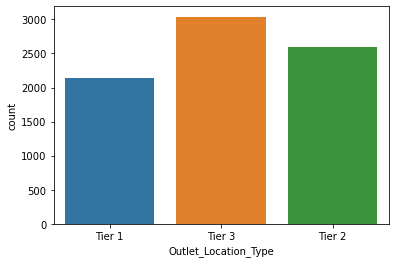

In [67]:
print(df["Outlet_Location_Type"].value_counts())
sb.countplot(df["Outlet_Location_Type"])

Outlet size == 1 is medium size , 2 is small ,  3 is high


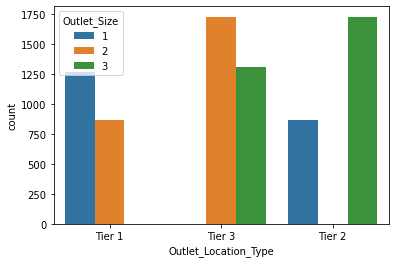

In [68]:
sb.countplot(df["Outlet_Location_Type"] , hue = df["Outlet_Size"] )
print("Outlet size == 1 is medium size , 2 is small ,  3 is high")

### In bad tier location , We have majority of outlet area( high outlet area)
### This can be due to population living or more free space in tier 3 area

In [69]:
mapp = {
    "Tier 3" : 3 , "Tier 2":1 , "Tier 1":2
}
df.loc[: , "Outlet_Location_Type"] = df.loc[: , "Outlet_Location_Type"].map(mapp)

Outlet size == 1 is medium size , 2 is small ,  3 is high


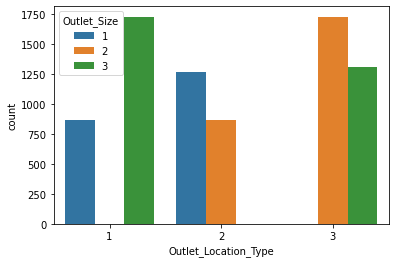

In [70]:
sb.countplot(df["Outlet_Location_Type"] , hue = df["Outlet_Size"] )
print("Outlet size == 1 is medium size , 2 is small ,  3 is high")

In [71]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
Item_Weight,1.000000,0.025202,-0.011904,0.036343,0.027181,-0.008069,0.001209,0.012891,0.008839
Item_Fat_Content,0.025202,1.000000,-0.057360,-0.144768,-0.012756,-0.006849,-0.002195,-0.005665,-0.021578
Item_Visibility,-0.011904,-0.057360,1.000000,0.054497,0.002599,-0.022496,-0.007711,0.019084,-0.059361
Item_Type,0.036343,-0.144768,0.054497,1.000000,0.057840,0.007480,-0.003525,-0.008739,0.034615
Item_MRP,0.027181,-0.012756,0.002599,0.057840,1.000000,0.004344,-0.005944,0.003209,0.577356
Outlet_Establishment_Year,-0.008069,-0.006849,-0.022496,0.007480,0.004344,1.000000,0.048901,-0.506451,-0.069994
Outlet_Size,0.001209,-0.002195,-0.007711,-0.003525,-0.005944,0.048901,1.000000,0.075229,-0.018297
Outlet_Location_Type,0.012891,-0.005665,0.019084,-0.008739,0.003209,-0.506451,0.075229,1.000000,0.006432
Item_Outlet_Sales,0.008839,-0.021578,-0.059361,0.034615,0.577356,-0.069994,-0.018297,0.006432,1.000000


#### Outlet location type depends 50% on Establishment year , and Establishment year depends 5 % on outlet area size

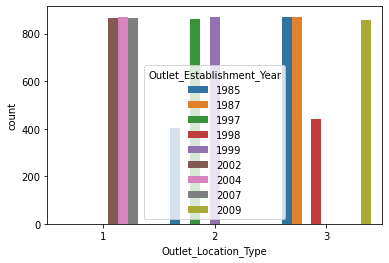

In [72]:
sb.countplot(df["Outlet_Location_Type"] , hue = df["Outlet_Establishment_Year"] )

In [73]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Code
0,9.300000,1,-1.794598,7,249.8092,1999,2,2,Supermarket Type1,3735.1380,FD
1,5.920000,0,-1.714933,3,48.2692,2009,2,3,Supermarket Type2,443.4228,DR
2,17.500000,1,-1.775724,1,141.6180,1999,2,2,Supermarket Type1,2097.2700,FD
6,13.650000,0,-1.894793,7,57.6588,1987,3,3,Supermarket Type1,343.5528,FD
7,12.857645,1,-0.894593,7,107.7622,1985,2,3,Supermarket Type3,4022.7636,FD
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,1,-1.245779,7,214.5218,1987,3,3,Supermarket Type1,2778.3834,FD
8519,8.380000,0,-1.328065,4,108.1570,2002,3,1,Supermarket Type1,549.2850,FD
8520,10.600000,1,-1.453627,2,85.1224,2004,1,1,Supermarket Type1,1193.1136,NC
8521,7.210000,0,-0.837972,7,103.1332,2009,2,3,Supermarket Type2,1845.5976,FD


### Look at type of outlet

Supermarket Type1    5199
Supermarket Type3     871
Supermarket Type2     857
Grocery Store         842
Name: Outlet_Type, dtype: int64


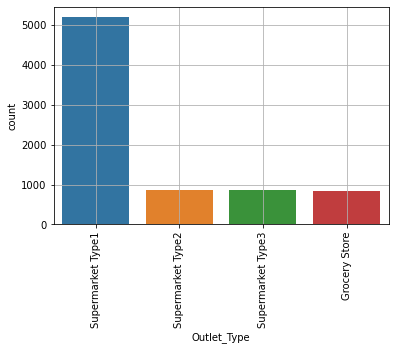

In [74]:
print(df["Outlet_Type"].value_counts())
sb.countplot(df["Outlet_Type"])
plt.xticks(rotation = 90)
plt.grid()
plt.show()

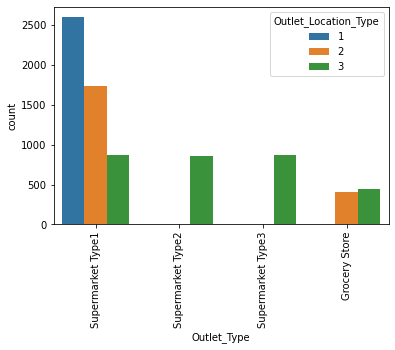

3 is tier 3 , 2 is tier 1 and 1 is tier 2


In [75]:
sb.countplot(df["Outlet_Type"] , hue = df["Outlet_Location_Type"])
plt.xticks(rotation = 90)
plt.show()
print("3 is tier 3 , 2 is tier 1 and 1 is tier 2")

#### We can see , majority is in supermarket type 1

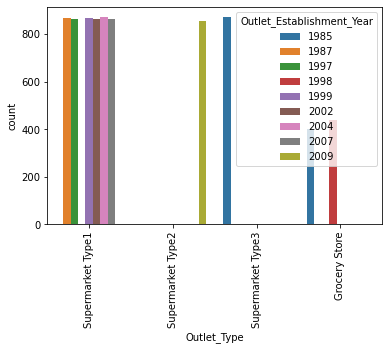

In [76]:
sb.countplot(df["Outlet_Type"] , hue = df["Outlet_Establishment_Year"])
plt.xticks(rotation = 90)
plt.show()

In [77]:
## map
types = {"Supermarket Type1":4 , "Supermarket Type2":3 , "Supermarket Type3":2 , "Grocery Store":1
    
}
df.loc[: , "Outlet_Type"] = df.loc[: , "Outlet_Type"].map(types)

In [78]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Code
0,9.300000,1,-1.794598,7,249.8092,1999,2,2,4,3735.1380,FD
1,5.920000,0,-1.714933,3,48.2692,2009,2,3,3,443.4228,DR
2,17.500000,1,-1.775724,1,141.6180,1999,2,2,4,2097.2700,FD
6,13.650000,0,-1.894793,7,57.6588,1987,3,3,4,343.5528,FD
7,12.857645,1,-0.894593,7,107.7622,1985,2,3,2,4022.7636,FD
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,1,-1.245779,7,214.5218,1987,3,3,4,2778.3834,FD
8519,8.380000,0,-1.328065,4,108.1570,2002,3,1,4,549.2850,FD
8520,10.600000,1,-1.453627,2,85.1224,2004,1,1,4,1193.1136,NC
8521,7.210000,0,-0.837972,7,103.1332,2009,2,3,3,1845.5976,FD


In [79]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,0.025202,-0.011904,0.036343,0.027181,-0.008069,0.001209,0.012891,-0.001216,0.008839
Item_Fat_Content,0.025202,1.000000,-0.057360,-0.144768,-0.012756,-0.006849,-0.002195,-0.005665,-0.006568,-0.021578
Item_Visibility,-0.011904,-0.057360,1.000000,0.054497,0.002599,-0.022496,-0.007711,0.019084,-0.101738,-0.059361
Item_Type,0.036343,-0.144768,0.054497,1.000000,0.057840,0.007480,-0.003525,-0.008739,0.018857,0.034615
Item_MRP,0.027181,-0.012756,0.002599,0.057840,1.000000,0.004344,-0.005944,0.003209,0.002413,0.577356
Outlet_Establishment_Year,-0.008069,-0.006849,-0.022496,0.007480,0.004344,1.000000,0.048901,-0.506451,0.423132,-0.069994
Outlet_Size,0.001209,-0.002195,-0.007711,-0.003525,-0.005944,0.048901,1.000000,0.075229,0.073130,-0.018297
Outlet_Location_Type,0.012891,-0.005665,0.019084,-0.008739,0.003209,-0.506451,0.075229,1.000000,-0.524445,0.006432
Outlet_Type,-0.001216,-0.006568,-0.101738,0.018857,0.002413,0.423132,0.073130,-0.524445,1.000000,0.171134
Item_Outlet_Sales,0.008839,-0.021578,-0.059361,0.034615,0.577356,-0.069994,-0.018297,0.006432,0.171134,1.000000


### We can see that  , outlet type contributes 50 % of location of outlet and 17 % in sales and 42 % with year
### This is a good find , we can build tier 1 supermarket and can have more profit !

### Lets check Item Code

In [80]:
df["Item_Code"]

0       FD
1       DR
2       FD
6       FD
7       FD
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Code, Length: 7769, dtype: object

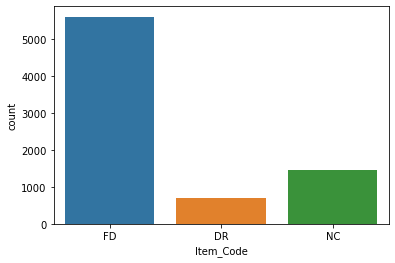

In [81]:
sb.countplot(df["Item_Code"])

In [82]:
## map
types = {"FD":3 , "DR":1 , "NC":2    
}
df.loc[: , "Item_Code"] = df.loc[: , "Item_Code"].map(types)

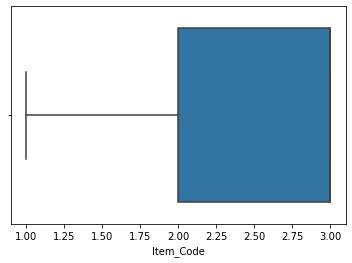

In [83]:
sb.boxplot(df["Item_Code"])

In [84]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Code
Item_Weight,1.000000,0.025202,-0.011904,0.036343,0.027181,-0.008069,0.001209,0.012891,-0.001216,0.008839,0.014791
Item_Fat_Content,0.025202,1.000000,-0.057360,-0.144768,-0.012756,-0.006849,-0.002195,-0.005665,-0.006568,-0.021578,-0.371542
Item_Visibility,-0.011904,-0.057360,1.000000,0.054497,0.002599,-0.022496,-0.007711,0.019084,-0.101738,-0.059361,0.056016
Item_Type,0.036343,-0.144768,0.054497,1.000000,0.057840,0.007480,-0.003525,-0.008739,0.018857,0.034615,0.428214
Item_MRP,0.027181,-0.012756,0.002599,0.057840,1.000000,0.004344,-0.005944,0.003209,0.002413,0.577356,0.044512
Outlet_Establishment_Year,-0.008069,-0.006849,-0.022496,0.007480,0.004344,1.000000,0.048901,-0.506451,0.423132,-0.069994,-0.003901
Outlet_Size,0.001209,-0.002195,-0.007711,-0.003525,-0.005944,0.048901,1.000000,0.075229,0.073130,-0.018297,-0.003657
Outlet_Location_Type,0.012891,-0.005665,0.019084,-0.008739,0.003209,-0.506451,0.075229,1.000000,-0.524445,0.006432,0.002056
Outlet_Type,-0.001216,-0.006568,-0.101738,0.018857,0.002413,0.423132,0.073130,-0.524445,1.000000,0.171134,0.002572
Item_Outlet_Sales,0.008839,-0.021578,-0.059361,0.034615,0.577356,-0.069994,-0.018297,0.006432,0.171134,1.000000,0.038318


# The Final Conclusion #

## Item MRP accounts for 57 % for the total sales !
## In Item type 14% accounts for fat food and 86% for regular food
## Establishment year accounts for 50 % for choosing the loaction type ,and 42 % for choosing outlet type , where as outlet type depends on outlet location also with 53 % co-relation
## outlet types accounts for 17 % of total sales !

## To get more profit ##

## Load the outlet , with more regular food and make the outlet location in tier 2 (medium area) , and the outlet should be built after 2000

In [85]:
###############################################################################################################################